## Lab 7. Kamaletdinova Julia

In [54]:
library(ggplot2)
library(CCA)
library(corrplot)
library(igraph)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
df = read.table('nut_dataframe.csv', sep=',', header=TRUE, na.strings="NA")
head(df)

X,Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,⋯,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,-2.12899,-0.9808181,0.2691854,-0.1585673,-1.0883455,0.7900028,0.5494152,0.7037179,0.7337723,⋯,3,2,1,1,0,0,0,1,0,1
1,-2.12899,-0.6495050,0.2691854,-0.1585673,-1.7436236,0.6776419,-0.5445412,0.7527438,0.8547601,⋯,2,2,1,1,0,0,1,1,0,1
2,-2.12899,-0.6495050,0.2691854,-0.9909240,0.8774887,0.4529201,-0.5445412,0.3609298,0.4388255,⋯,2,2,1,1,0,0,1,1,0,1
3,-2.12899,0.6757476,-0.5464464,-0.4003575,-0.4330675,0.6776419,0.9869978,0.7633832,0.1432029,⋯,3,1,1,1,0,0,1,1,0,1
4,-2.12899,-1.3121313,0.4461669,-0.4003575,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.1032154,⋯,1,3,0,1,1,0,1,1,0,1
5,-2.12899,-0.9808181,0.6145117,-0.9909240,1.5327668,0.1158374,-0.5445412,-0.2002730,0.7816652,⋯,1,3,1,1,1,1,1,1,0,2


In [5]:
sizes <- df[, 10:13]
head(sizes)

PodsWeight,PodsNumber,SeedsNumber,SeedsWeight
<dbl>,<dbl>,<dbl>,<dbl>
0.7337723,0.71593979,1.0494188,0.7284773
0.8547601,0.92993941,1.4442088,0.8600099
0.4388255,0.05897002,0.6238324,0.4231896
0.1432029,-0.04390338,0.3139857,0.2980390
-0.1032154,-0.48403174,-0.2213891,-0.3174326
0.7816652,0.80473838,1.0346461,0.3725953


In [8]:
periods <- df[, 3:6]
head(periods)

GBegF,BegFEndF,EndFBegM,BegMEndM
<dbl>,<dbl>,<dbl>,<dbl>
-0.9808181,0.2691854,-0.1585673,-1.0883455
-0.6495050,0.2691854,-0.1585673,-1.7436236
-0.6495050,0.2691854,-0.9909240,0.8774887
0.6757476,-0.5464464,-0.4003575,-0.4330675
-1.3121313,0.4461669,-0.4003575,-1.0883455
-0.9808181,0.6145117,-0.9909240,1.5327668


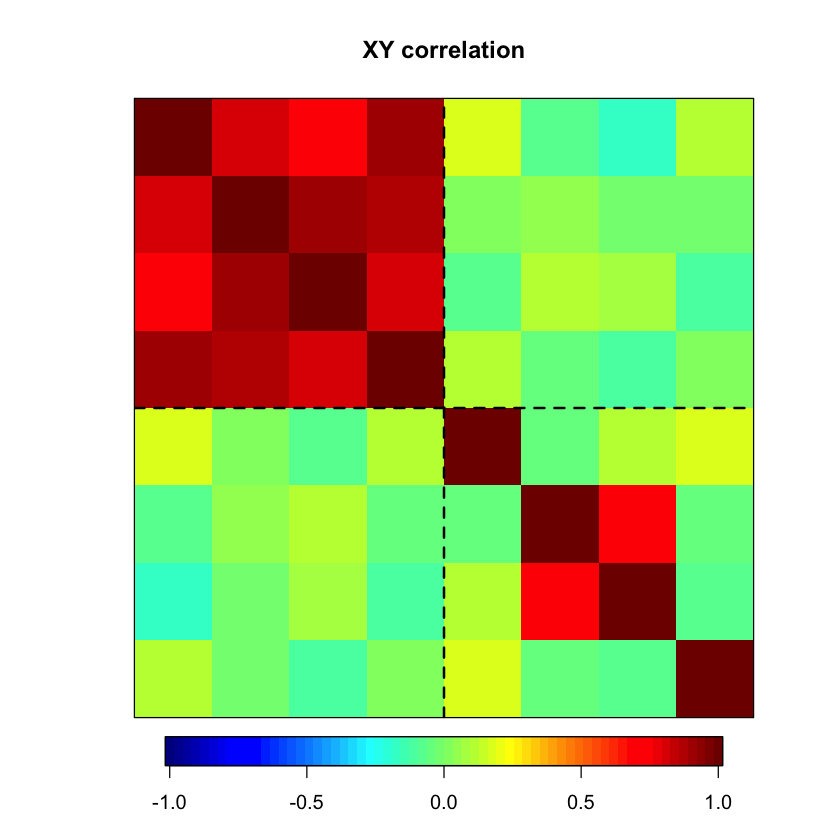

In [16]:
correlation <- matcor(sizes, periods)
img.matcor(correlation)

In [48]:
cc1 <- cc(sizes, periods)
corrs <- data.frame("corr" = sapply(cc1$cor, function(x) round(x, 2)))
corrs

corr
<dbl>
0.49
0.14
0.09
0.06


In [42]:
sizes.coeffs <- apply(cc1$xcoef, 2, function(x) round(x, 2))
periods.coeffs <- apply(cc1$ycoef, 2, function(x) round(x, 2))
sizes.coeffs
periods.coeffs

PodsWeight,-0.74,-1.19,0.44,-1.92
PodsNumber,-0.09,-1.39,-0.17,2.30
SeedsNumber,1.46,0.05,-0.28,-1.91
SeedsWeight,-0.75,2.18,-0.98,1.20


GBegF,-0.69,0.12,-0.51,0.59
BegFEndF,-0.01,-1.23,-0.84,0.06
EndFBegM,0.65,0.78,0.87,0.69
BegMEndM,-0.33,-0.50,0.82,0.08


In [91]:
CVs <- c("CV1 for sizes", "CV2 for sizes", "CV1 for periods", "CV2 for periods")

In [93]:
edges = cbind(c(rep(colnames(sizes), 2), rep(colnames(periods), 2), CVs[1:2]), 
              c(c(rep(CVs[1], 4), rep(CVs[2], 4), rep(CVs[3], 4), rep(CVs[4], 4)), CVs[3:4]))
edges

PodsWeight,CV1 for sizes
PodsNumber,CV1 for sizes
SeedsNumber,CV1 for sizes
SeedsWeight,CV1 for sizes
PodsWeight,CV2 for sizes
PodsNumber,CV2 for sizes
SeedsNumber,CV2 for sizes
SeedsWeight,CV2 for sizes
GBegF,CV1 for periods
BegFEndF,CV1 for periods
EndFBegM,CV1 for periods


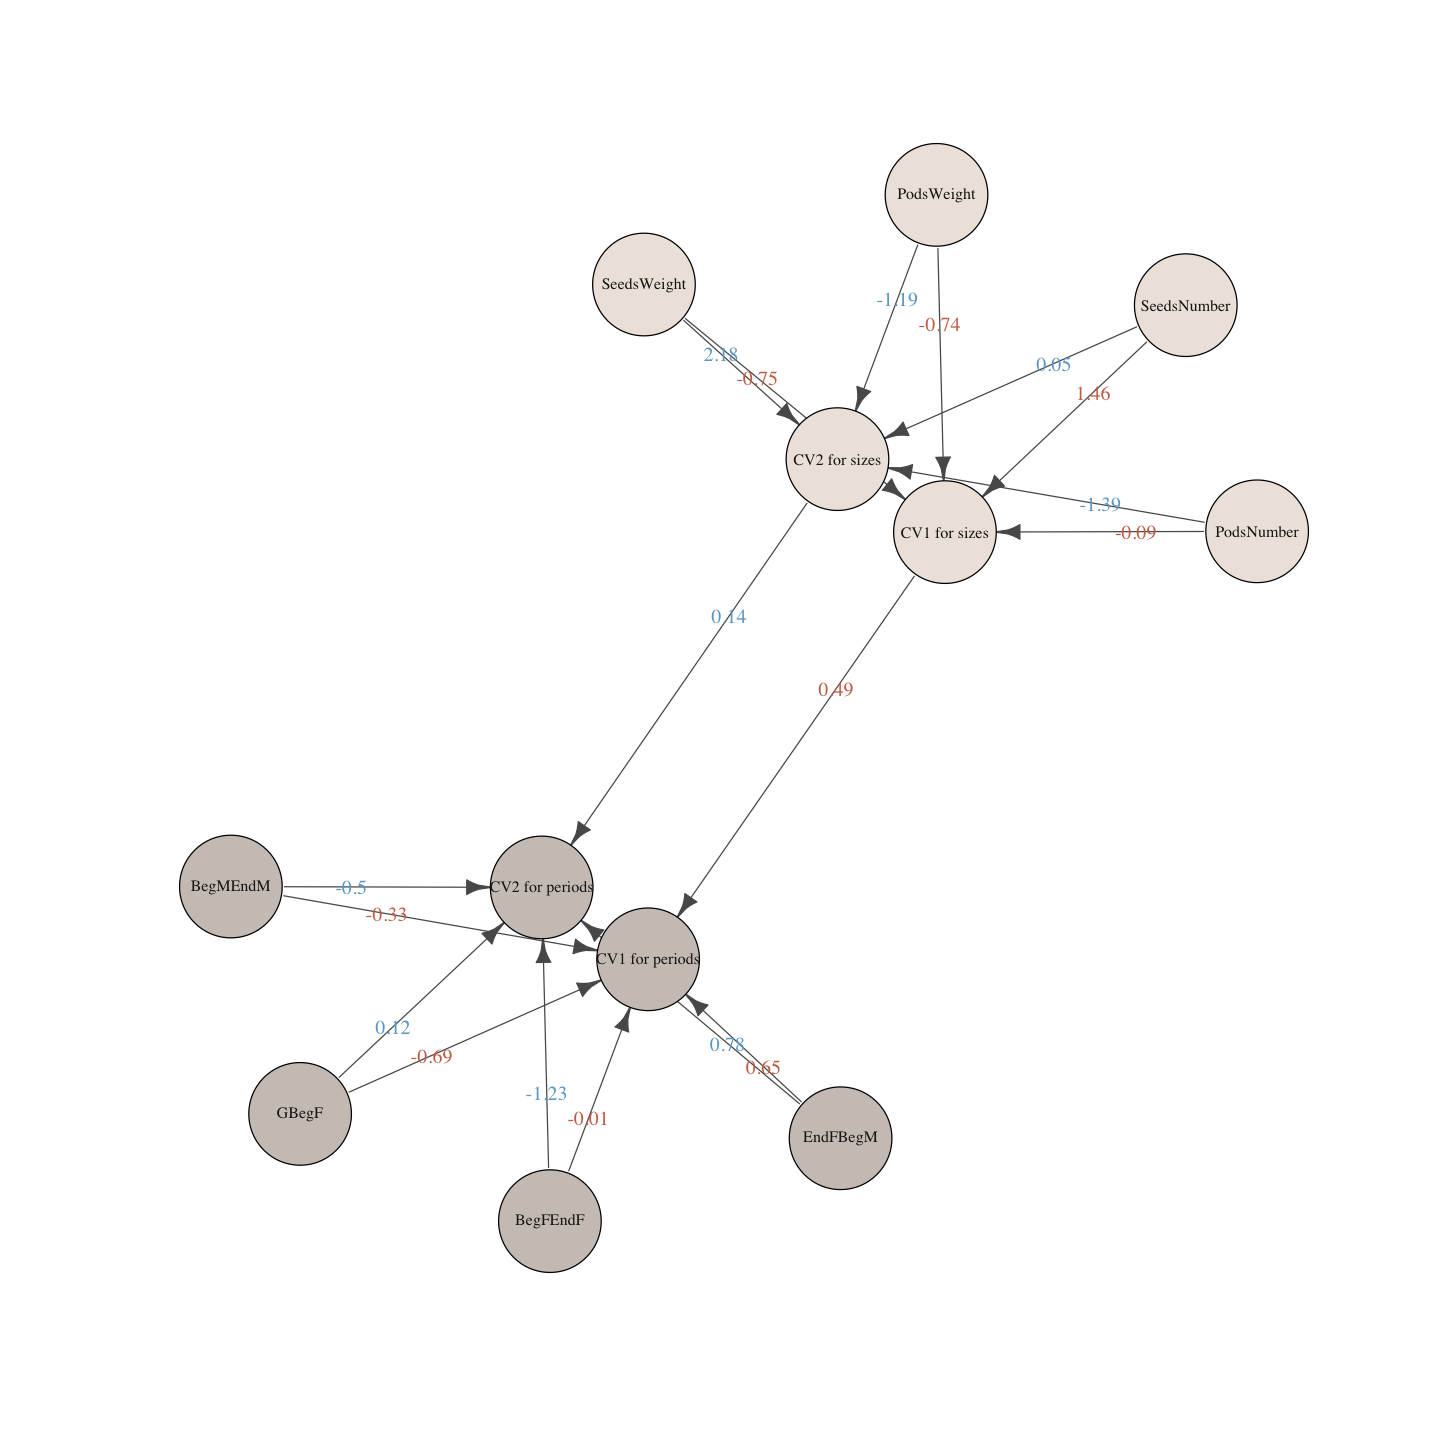

In [164]:
options(repr.plot.width = 12, repr.plot.height = 12)
graph = graph_from_edgelist(edges)
colors <- c(rep("salmon3", 4), rep("skyblue3", 4), 
            rep("salmon3", 4), rep("skyblue3", 4),
            "salmon3", "skyblue3")

vert.colors <- c(rep("seashell2", 3), rep("seashell2", 3), 
                 rep("seashell3", 3), rep("seashell3", 3))

labels <- c(sizes.coeffs[,1], sizes.coeffs[,2], 
            periods.coeffs[,1], periods.coeffs[,2], 
            corrs[1, ], corrs[2, ])

plot.igraph(graph, 
            
            # === Vertex
            vertex.size = 20, 
            vertex.size2 = 4,
            vertex.shape = "circle", 
            vertex.label.cex = 0.8,
            vertex.label.dist = 0,
            vertex.label.color = "gray11",
            vertex.color = vert.colors,
            arrow.size = 5,
            
            # === Edge
            edge.color = "gray35",
            edge.arrow.size = 0.5,
            layout = layout_nicely, 
            edge.label = labels,
            edge.label.cex = 1,
            edge.label.color = colors)